In [11]:
#Here goes the 2 class Explainability!! Based on correct prediction only

In [12]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [39]:
import numpy as np
import pickle

data_dir = './data/'
ref_weights_dir = "./reference_weights/"
saved_weights_dir = "./saved_weights/"
results_dir = "./results/"
shap_dir = "./shap/"

timestamp = "20250310163939"
shap_type = ""

with open(f"{shap_dir}{timestamp}_shap_values{shap_type}", "rb") as fp:   # Unpickling
    shap_values_all = pickle.load(fp)
    
with open(f"{shap_dir}{timestamp}_y_test_all{shap_type}", "rb") as fp:   # Unpickling
    y_test_all = pickle.load(fp)

with open(f"{shap_dir}{timestamp}_y_pred_all{shap_type}", "rb") as fp:   # Unpickling
    y_pred_all = pickle.load(fp)
    


In [40]:
print('Shape of a single SHAP elemenet in the list: ',np.shape(shap_values_all[0]))
#class,trial,1,chan,samples
print('Shape of a random y_test in the list: ',np.shape(y_test_all[0]))
print('Shape of a random y_pred in the list: ',np.shape(y_pred_all[0]))

Shape of a single SHAP elemenet in the list:  (686, 1, 19, 200, 2)
Shape of a random y_test in the list:  (686,)
Shape of a random y_pred in the list:  (686, 2)


In [41]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 258, 1, 56, 768, 2 -> 2, 258, 1, 56, 768
# 686, 22, 200, 1, 2
# 686, 1, 19, 200, 2
nSub=8
for sub in range(nSub):
    if sub==0:
        shap_temp = np.array(shap_values_all[sub])
        shap_temp = np.transpose(shap_temp,[4,0,1,2,3])

        shap_values_kmi=np.array(shap_temp[0])
        shap_values_vmi=np.array(shap_temp[1])

    else:
        shap_temp = np.array(shap_values_all[sub])
        shap_temp = np.transpose(shap_temp,[4,0,1,2,3])

        temp=np.array(shap_temp[0])
        shap_values_kmi=np.concatenate((shap_values_kmi,temp),axis=0)

        temp=np.array(shap_temp[1])
        shap_values_vmi=np.concatenate((shap_values_vmi,temp),axis=0)
        


shap_values_kmi =np.squeeze(shap_values_kmi)
shap_values_vmi =np.squeeze(shap_values_vmi)

print('Shape of all SHAP values for NT class: ', np.shape(shap_values_kmi))
print('Shape of all SHAP values for ST class: ', np.shape(shap_values_vmi))

y_test_all=np.concatenate( y_test_all )
y_pred_all=np.concatenate( y_pred_all )

print('Shape of all y_test array: ', np.shape(y_test_all))
print('Shape of all y_pred array: ', np.shape(y_pred_all))



Shape of all SHAP values for NT class:  (6616, 19, 200)
Shape of all SHAP values for ST class:  (6616, 19, 200)
Shape of all y_test array:  (6616,)
Shape of all y_pred array:  (6616, 2)


In [42]:
SHAPS_0=[]
SHAPS_1=[]

print(np.shape(y_test_all))
print(np.shape(y_pred_all))
print(np.shape(shap_values_kmi))

y_pred_classes = np.argmax(y_pred_all, axis=1)

for i in range(len(y_test_all)):
    if y_test_all[i] == y_pred_classes[i]:
        if y_test_all[i] == 0:
            SHAPS_0.append(np.squeeze(shap_values_kmi[i]))
        else:
            SHAPS_1.append(np.squeeze(shap_values_vmi[i]))
print('Instances of correct 0 class: ', len(SHAPS_0))
print('Instances of correct 1 class: ', len(SHAPS_1))
print('A sample shape of a single SHAP after squeeze: ', np.shape(shap_values_vmi[i]))

SHAPS_0=np.stack( SHAPS_0, axis=0 )
SHAPS_1=np.stack( SHAPS_1, axis=0 )
print('Converting List of Final SHAPS_0 into array:' ,np.shape(SHAPS_0))
print('Converting List of Final SHAPS_1 into array:' ,np.shape(SHAPS_1))

(6616,)
(6616, 2)
(6616, 19, 200)
Instances of correct 0 class:  3201
Instances of correct 1 class:  3052
A sample shape of a single SHAP after squeeze:  (19, 200)
Converting List of Final SHAPS_0 into array: (3201, 19, 200)
Converting List of Final SHAPS_1 into array: (3052, 19, 200)


In [43]:
# Save files (removes from kernel variable)
shaps_0 = np.save(f'{shap_dir}{timestamp}_SHAPS_0.npy', SHAPS_0 ,allow_pickle=True)
shaps_1 = np.save(f'{shap_dir}{timestamp}_SHAPS_1.npy', SHAPS_1 ,allow_pickle=True)

(6253, 19, 200)


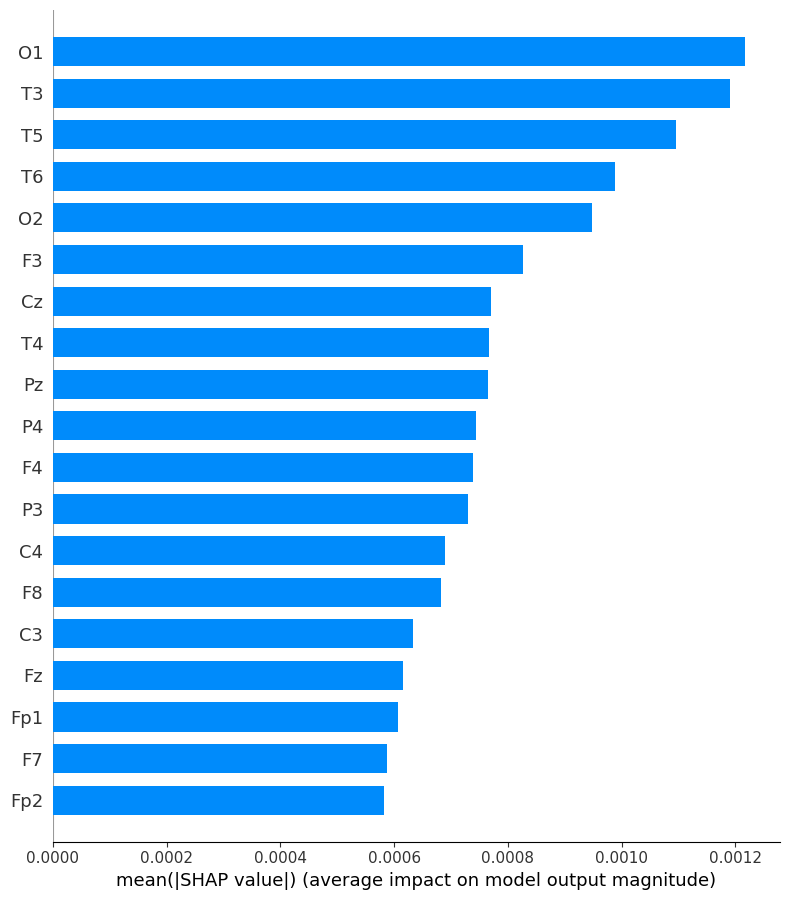

<Figure size 640x480 with 0 Axes>

In [44]:
import shap
import matplotlib.pyplot as plt

# Reload files
# with open(f"{shap_dir}{timestamp}_SHAPS_0.npy", "rb") as fp:   # Unpickling
#     shaps_0 = pickle.load(fp)
# with open(f"{shap_dir}{timestamp}_SHAPS_1.npy", "rb") as fp:   # Unpickling
#     shaps_1 = pickle.load(fp)
names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
# names = ['Fp1','Fz','F3','F7','FC5','FC1','C3','CP5','CP1','Pz','P3','P7','O1','Oz','O2','P4','P8','CP6','CP2','Cz','C4','FC6','FC2','F4','F8','Fp2','AF7','AF3','AFz','F1','F5','FC3','C1','C5','TP7','CP3','P1','P5','PO7','PO3','POz','PO4','PO8','P6','P2','CPz','CP4','TP8','C6','C2','FC4','F6','AF8','AF4','F2','FCz']
allCond = np.concatenate((SHAPS_0,SHAPS_1),axis=0)
print(np.shape(allCond))
allCond= np.abs(allCond)
fig=shap.summary_plot(np.mean(allCond,axis=2), plot_type = 'bar', feature_names = names,show=True)
plt.savefig(f'{shap_dir}{timestamp}_shap.jpg', format='jpg')



In [ ]:
SHAPS_0 = np.mean(np.abs(SHAPS_0),axis=0)
SHAPS_1 = np.mean(np.abs(SHAPS_1),axis=0)

print(np.shape(SHAPS_0))
print(np.shape(SHAPS_1))
#Here goes the individual explainability

(22, 200)
(22, 200)


In [22]:
import numpy as np
import pickle

with open(f"{shap_dir}{timestamp}_shaps_values_all_{shap_type}", "rb") as fp:   # Unpickling
    shap_values_all = pickle.load(fp)
    
with open(f"{shap_dir}{timestamp}_y_test_all_{shap_type}", "rb") as fp:   # Unpickling
    y_test_all = pickle.load(fp)

with open(f"{shap_dir}{timestamp}_y_pred_all_{shap_type}", "rb") as fp:   # Unpickling
    y_pred_all = pickle.load(fp)
    


In [ ]:
print('Shape of a single SHAP elemenet in the list: ',np.shape(shap_values_all[0]))
#class,trial,1,chan,samples

print('Shape of a random y_test in the list: ',np.shape(y_test_all[0]))
print('Shape of a random y_pred in the list: ',np.shape(y_pred_all[0]))

Shape of a single SHAP elemenet in the list:  (2, 131, 1, 56, 400)
Shape of a random y_test in the list:  (131,)
Shape of a random y_pred in the list:  (131,)


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

shap_sub=[]

nSub=8
for sub in range(nSub):
    shap_values_sub=np.array(shap_values_all[sub])
    temp=[]
    for i in range(len(y_test_all[sub])):
        if y_test_all[sub][i]== y_pred_all[sub][i]:
            if y_test_all[sub][i] == 0:
                temp.append(np.squeeze(shap_values_sub[0,i,:,:,:]))
            if y_test_all[sub][i] == 1:
                temp.append(np.squeeze(shap_values_sub[1,i,:,:,:]))
    shap_sub.append(np.mean(np.abs(np.array(temp)),axis=0))


print(np.shape(shap_sub[0]))
 


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
best_ch=[]
n=10 #how many best channels
for sub in range(nSub):
    temp=shap_sub[sub]
    temp=np.mean(np.abs(temp),axis=1)
    print((-temp).argsort()[:n])
    best_ch.append((-temp).argsort()[:n])


[26 30 24  0 52  3 25 51 33 28]
[26 52 25  3 13 30 46  0 33 53]
[26  0 25 30 52 24 37  3 28 38]
[25 26 52 30  3 51 24  4 11  0]
[ 3 26 52 30 24 25  9 51  4  0]
[24 26  3 30 52 25 51 33 21 48]
[26 52 38 25 30 13 34 24 51  3]
[52 26 30 25  0  3 44 53 28 41]
[52 26 25  3 24  4 30 51 36  0]
[24 26  3 50 52 30  4 51 25 19]
[26  3 52 30 25 24 53 38 51 33]
[26 28 52 24 25 30  3 51  4  1]
[52 26  3 30 25 51 37  0 24 33]
[26 52 25 24 33 12 51 30  0 27]
[26 25 52  3 33 24 30 21  0 23]
[52  0  3 26 30 25 51 44 24 28]


In [ ]:
np.save('best_ch.npy', best_ch ,allow_pickle=True)
